## Problem 1: Grover's algorithm

In [1]:
from qiskit import QuantumProgram
from qiskit.tools.visualization import plot_histogram
from qutip import *
import Qconfig
import numpy as np
import matplotlib.pyplot as plt

In this exercise, you'll design and execute the two-qubit Grover's algorithm.

(a) Suppose the "marked" two-qubit state we're searching for is $|\psi\rangle=|10\rangle$. Construct a numpy array representing the oracle matrix $U_f$, which acts on basis states according to
\begin{equation}
U_f |x\rangle = (-1)^{f(x)} |x\rangle,
\end{equation}
where $f(x) = 0$ for unmarked qubit states and $f(x)=1$ for the marked qubit state.

In [2]:
# generate all 2-qubits states for testing
state1 = np.array([[1],[0],[0],[0]]) # |00>
state2 = np.array([[0],[1],[0],[0]]) # |01>
state3 = np.array([[0],[0],[1],[0]]) # |10>
state4 = np.array([[0],[0],[0],[1]]) # |00>

# generate and display U_f, acting only on the marked state |10>
# making -1 for marked qubit and 1 otherwise
U_f = np.array([[1,0,0,0],[0,1,0,0],[0,0,-1,0],[0,0,0,1]])
display(U_f)

# testing to make sure it works
display(U_f @ state1) # |00> -> |00>
display(U_f @ state2) # |01> -> |01>
display(U_f @ state3) # |10> -> -|10>
display(U_f @ state4) # |11> -> |11>
# yes, intended behavior

array([[ 1,  0,  0,  0],
       [ 0,  1,  0,  0],
       [ 0,  0, -1,  0],
       [ 0,  0,  0,  1]])

array([[1],
       [0],
       [0],
       [0]])

array([[0],
       [1],
       [0],
       [0]])

array([[ 0],
       [ 0],
       [-1],
       [ 0]])

array([[0],
       [0],
       [0],
       [1]])

(b) Construct a matrix in numpy that applies the Hadamard transform to each qubit, $H^{\otimes n}$.

In [3]:
# define Hamadard matrix in numpy
H = 1/np.sqrt(2)*np.array([[1,1],[1,-1]])

# tensored Hadamard for 2 qubits. Could tensor it
# more to apply to arbitrarily many qubits
H2 = np.kron(H, H)
display(H2)

array([[ 0.5,  0.5,  0.5,  0.5],
       [ 0.5, -0.5,  0.5, -0.5],
       [ 0.5,  0.5, -0.5, -0.5],
       [ 0.5, -0.5, -0.5,  0.5]])

(c) Construct a conditional phase shift gate $U_{\text{ps}}$ in numpy, with every computational basis state except $|0\rangle$ receiving a phase shift of $-1$:
\begin{equation}
U_{\text{ps}} |x\rangle = -(-1)^{\delta_{x,0}} |x\rangle
\end{equation}

In [4]:
### Originally did everything with 1-qubit because it was asking for |0> ###
# genreate single-qubit states for testing
state5 = np.array([[1],[0]])
state6 = np.array([[0],[1]])
display(state5)
display(state6)

# generate U_ps that maps |0> to |0> and |1> to -|1> and display it
U_ps = np.array([[1,0],[0,-1]])
display(U_ps)

# testing to make sure it works
display(U_ps @ state5) # |0> -> |0>
display(U_ps @ state6) # |1> -> -|1>
# yes, intended behavior

###############################################################################

### Redoing it all with 2-qubits in order for the tensoring to fit later on ###
### Assuming |00> --> no change and everything else phase shift of -1
U_ps2 = np.array([[1,0,0,0],[0,-1,0,0],[0,0,-1,0],[0,0,0,-1]])
display(U_ps2)

# testing to make sure it works
display(U_ps2 @ state1) # |00> -> |00>
display(U_ps2 @ state2) # |01> -> -|01>
display(U_ps2 @ state3) # |10> -> -|10>
display(U_ps2 @ state4) # |11> -> -|11>
# yes, intended behavior

array([[1],
       [0]])

array([[0],
       [1]])

array([[ 1,  0],
       [ 0, -1]])

array([[1],
       [0]])

array([[ 0],
       [-1]])

array([[ 1,  0,  0,  0],
       [ 0, -1,  0,  0],
       [ 0,  0, -1,  0],
       [ 0,  0,  0, -1]])

array([[1],
       [0],
       [0],
       [0]])

array([[ 0],
       [-1],
       [ 0],
       [ 0]])

array([[ 0],
       [ 0],
       [-1],
       [ 0]])

array([[ 0],
       [ 0],
       [ 0],
       [-1]])

(d) Construct the unitary operator $2 |0\rangle \langle 0| - 1$ in numpy and show that it is equal to the gate $U_{\text{ps}}$ that you constructed in part (c).

In [5]:
### Originally did everything with 1-qubit because it was asking for |0> ###
# define |0> and <0| in numpy and display them
zero_ket = np.array([[1],[0]])
zero_bra = np.transpose(zero_ket)
display(zero_ket)
display(zero_bra)

# generate the asked unitary operator and display it
unitary_op = 2 * np.kron(zero_ket, zero_bra) - np.identity(2)
display(unitary_op)

# verify that it equals U_ps from part (c)
display(unitary_op == U_ps) # yes, they are equal

###############################################################################

### Redoing it all with 2-qubits in order for the tensoring to fit later on ###
zero_ket2 = np.array([[1],[0],[0],[0]])
zero_bra2 = np.transpose(zero_ket2)

# generate the asked unitary operator and display it
unitary_op2 = 2 * np.kron(zero_ket2, zero_bra2) - np.identity(4)
display(unitary_op2)

# verify that it equals U_ps from part (c)
display(unitary_op2 == U_ps2) # yes, they are equal

array([[1],
       [0]])

array([[1, 0]])

array([[ 1.,  0.],
       [ 0., -1.]])

array([[ True,  True],
       [ True,  True]], dtype=bool)

array([[ 1.,  0.,  0.,  0.],
       [ 0., -1.,  0.,  0.],
       [ 0.,  0., -1.,  0.],
       [ 0.,  0.,  0., -1.]])

array([[ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True]], dtype=bool)

(e) Construct the "reflection" gate $U_s = 2 |s\rangle\langle s|-1$ as a numpy array, where $|s\rangle$ is an equally weighted superposition of basis states
\begin{equation}
|s\rangle = \frac{1}{\sqrt{N}} \sum_{x = 0}^{N-1} |x\rangle.
\end{equation}

In [6]:
### Originally did everything with 1-qubit because it was asking for |0> ###
# single-qubit basis, so only two possible basis states
N = 2
# construct one_ket, we have zero_ket from before
one_ket = np.array([[0],[1]])

# construct |s> as a superposition of |0> and |1> and display
s_ket = 1/np.sqrt(N) * (zero_ket + one_ket)
display(s_ket)

# construct U_s as specified
U_s = np.round(2 * np.kron(s_ket, np.transpose(s_ket)) - np.identity(2)) # rounding to get rid of floating point error
display(U_s)

###############################################################################

### Redoing it all with 2-qubits in order for the tensoring to fit later on ###
# 2-qubits so 4 possible basis states
N2 = 4
# construct basis states
zero_zero_ket = np.array([[1],[0],[0],[0]])
zero_one_ket = np.array([[0],[1],[0],[0]])
one_zero_ket = np.array([[0],[0],[1],[0]])
one_one_ket = np.array([[0],[0],[0],[1]])

# construct |s> as a superposition of all 4 basis states and display
s_ket2 = 1/np.sqrt(N2) * (zero_zero_ket + zero_one_ket + one_zero_ket + one_one_ket)
display(s_ket2)

# construct U_s as specified
U_s2 = 2 * np.kron(s_ket2, np.transpose(s_ket2)) - np.identity(4)
display(U_s2)

array([[ 0.70710678],
       [ 0.70710678]])

array([[-0.,  1.],
       [ 1., -0.]])

array([[ 0.5],
       [ 0.5],
       [ 0.5],
       [ 0.5]])

array([[-0.5,  0.5,  0.5,  0.5],
       [ 0.5, -0.5,  0.5,  0.5],
       [ 0.5,  0.5, -0.5,  0.5],
       [ 0.5,  0.5,  0.5, -0.5]])

(f) Using the numpy arrays you constructed above, show that $H^{\otimes n} U_\text{ps} H^{\otimes n} = U_s.$

In [7]:
### Originally did everything with 1-qubit because it was asking for |0> ###
# construct H Ups H as specified and display it
HUpsH = np.round(H @ U_ps @ H) # rounding to get rid of floating point e^-17 error
display(HUpsH)

# verify that it equals U_s
display(U_s == HUpsH) # yes, they are equal

###############################################################################

### Redoing it all with 2-qubits in order for the tensoring to fit later on ###
# construct H Ups H as specified and display it
HUpH2 = np.round(H2 @ U_ps2 @ H2, 1) # rounding at 1 decimal place to get rid of floating point errors
display(HUpH2)

# verify that it equals U_s
HUpH2 == U_s2 # yes, they are equal

array([[-0.,  1.],
       [ 1., -0.]])

array([[ True,  True],
       [ True,  True]], dtype=bool)

array([[-0.5,  0.5,  0.5,  0.5],
       [ 0.5, -0.5,  0.5,  0.5],
       [ 0.5,  0.5, -0.5,  0.5],
       [ 0.5,  0.5,  0.5, -0.5]])

array([[ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True]], dtype=bool)

(g) In two sentences or fewer, give a geometric interpretation of the gate sequence $U_s U_f$. You may find [this](https://quantumexperience.ng.bluemix.net/proxy/tutorial/full-user-guide/004-Quantum_Algorithms/070-Grover's_Algorithm.html) reference from IBM interesting and helpful.

# Geometric Interpretation of the gate sequence U_s U_f

The sequence of gate U_s U_f performs two rotations that perform a significant amplitude amplification to the marked state and allows Grover to identify it by measurement collapsing with near certainty. More precisely, U_f performs a rotation about the |w> axis, which makes the amplitude of the marked qubit negative by the same angle it was above |w>, and then U_s performs a rotation of the marked qubit vector about the |s> axis which, now that the marked qubit has been rotated, performs an amplitude amplification because the angle difference between the market state vector and |s> was increased from applying U_f.

(h) Find the state of the computer after $1$, $2$, $5$, and $10$ Grover iterations. That is, for $t$ Grover iterations, find the state
\begin{equation}
|\psi_t\rangle= (U_s U_f)^t H^{\otimes n}|\psi_0\rangle,
\end{equation}
where $|\psi_0\rangle$ is the initial qubit state $|00\rangle$.

In [8]:
# initial state --> |00>
initial_state = np.array([[1],[0],[0],[0]])
display(initial_state)

# general Grover function as implemented above 
def Grover(t):
    return np.linalg.matrix_power(U_s2 @ U_f, t) @ H2 @ initial_state

# 1 Grover iteration
psi_1 = Grover(1)
display(psi_1)

# 2 Grover iterations
psi_2 = Grover(2)
display(psi_2)

# 5 Grover iterations
psi_5 = Grover(5)
display(psi_5)

# 10 Grover iterations
psi_10 = Grover(10)
display(psi_10)

array([[1],
       [0],
       [0],
       [0]])

array([[ 0.],
       [ 0.],
       [ 1.],
       [ 0.]])

array([[-0.5],
       [-0.5],
       [ 0.5],
       [-0.5]])

array([[ 0.5],
       [ 0.5],
       [-0.5],
       [ 0.5]])

array([[ 0.],
       [ 0.],
       [-1.],
       [ 0.]])

(i) Plot the fidelity $|\langle \psi | \psi_t \rangle|^2$ versus iteration number $t$ for $t$ ranging between $0$ and $100$. What do you see?

array([[0],
       [0],
       [1],
       [0]])

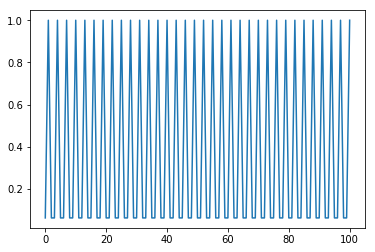

In [18]:
# we are looking for the marked state |10>, but we start our Grover
# on state |00>. Therefore, to find it and its fidelity, we will find
# the overlap of the two states

# the state we are looking for
marked_state = np.array([[0],[0],[1],[0]])
display(marked_state)

# general fidelity function that construct the state psi_t with
# Grover function defined above and then finds its fidelity for 
# the marked state
def fidelity(t):
    overlap = np.transpose(marked_state) @ Grover(t)
    return ((overlap @ np.transpose(overlap)) ** 2)[0][0]

# storing fidelities in array for easier plotting
fidelities = []
# range 101 to get 0 and 100 inclusive
for t in range(101):
    fidelities.append(fidelity(t))

# plotting
plt.plot(range(101), fidelities)
plt.show()

# What do you see?

As we can see, the fidelity is oscillating between 0 and 1 as the number of oscillations increases. It is 0 for t = 0 and 1 for t = 100. This makes sense, since as we can see on the Grover iterations above, when we run multiple iterations of Grover, we get a cyclical pattern, so it makes sense that the fidelity also follows a cyclical pattern.

(j) Design this circuit in QISKit for $t=2.$ If you use the reference above, you need to explicitly confirm that the sequence of H, S, X, and CNOT gates that you use matches the gates $U_s$ and $U_f$ constructed above.

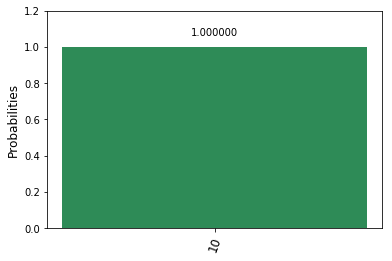

In [40]:
# Running Grover with the circuit found at the reference above
# define program
qp = QuantumProgram()
n = 2  # number of qubits
q = qp.create_quantum_register("q", n) # quantum register
c = qp.create_classical_register("c", n) # classical register
# create circuit
Grover = qp.create_circuit("Grover", [q], [c])
# add gates
Grover.h(q[1])
Grover.h(q[0])
Grover.s(q[1])
Grover.h(q[0])
Grover.cx(q[1], q[0])
Grover.h(q[0])
Grover.s(q[1])
Grover.h(q[1])
Grover.h(q[0])
Grover.x(q[1])
Grover.x(q[0])
Grover.h(q[0])
Grover.cx(q[1], q[0])
Grover.h(q[0])
Grover.x(q[1])
Grover.x(q[0])
Grover.h(q[1])
Grover.h(q[0])
# measure the qubits
Grover.measure(q[0], c[0])
Grover.measure(q[1], c[1])
# execute the circuit
results = qp.execute("Grover")
# plot the measurement results
plot_histogram(results.get_counts("Grover"))
# yes it worked -- found 01 with probability 1

In [71]:
# coding U_f and U_s2 in QuTip to show explicity that they are the same

# U_f
N = 2 # we have 2-qubits
Uf_circuit = QubitCircuit(N)
Uf_circuit.add_gate("PHASE", 0, arg_value=np.pi/2) # S gate
Uf_circuit.add_gate("SNOT", 1) # H gate
Uf_circuit.add_gate("CNOT", 1, 0) # CNOT gate
Uf_circuit.add_gate("SNOT", 1) # H gate
Uf_circuit.add_gate("PHASE", 0, arg_value=np.pi/2) # S gate
# find product of gates
Uf_gate = gate_sequence_product(Uf_circuit.propagators()) # equivalent to U_f

##########

# U_s
N = 2 # we have 2-qubits
Us_circuit = QubitCircuit(N)
Us_circuit.add_gate("SNOT", 1) # H gate
Us_circuit.add_gate("SNOT", 0) # H gate
Us_circuit.add_gate("NOT", 1) # X gate
Us_circuit.add_gate("NOT", 0) # X gate
Us_circuit.add_gate("SNOT", 1) # H gate
Us_circuit.add_gate("CNOT", 1, 0) # CNOT gate
Us_circuit.add_gate("SNOT", 1) # H gate
Us_circuit.add_gate("NOT", 1) # X gate
Us_circuit.add_gate("NOT", 0) # X gate

# find product of gates
Us_gate = gate_sequence_product(Uf_circuit.propagators()) # equivalent to U_s

(k) (Bonus +10) Implement the circuit from part (j) in IBM Q.

In [33]:
# define the program above for 5 qubits so it works on IBM Q
qp1 = QuantumProgram()
n = 5  # number of qubits (need 5 here so it matches ibm Q even tho we only use 2)
q1 = qp1.create_quantum_register("q1", n) # quantum register
c1 = qp1.create_classical_register("c1", n) # classical register
# initialize circuit
Grover2 = qp1.create_circuit("Grover2", [q1], [c1])
# add gates
Grover2.h(q1[1])
Grover2.h(q1[2])
Grover2.s(q1[1])
Grover2.h(q1[2])
Grover2.cx(q1[1], q1[2])
Grover2.h(q1[2])
Grover2.s(q1[1])
Grover2.h(q1[1])
Grover2.h(q1[2])
Grover2.x(q1[1])
Grover2.x(q1[2])
Grover2.h(q1[2])
Grover2.cx(q1[1], q1[2])
Grover2.h(q1[2])
Grover2.x(q1[1])
Grover2.x(q1[2])
Grover2.h(q1[1])
Grover2.h(q1[2])
# measure the qubits
Grover2.measure(q1[1], c1[1])
Grover2.measure(q1[2], c1[2])
# execute the circuit
results = qp1.execute("Grover2")

In [38]:
# using my API key and checking for availability of IBM Q
Q_program = QuantumProgram()
Q_program.set_api(Qconfig.APItoken, Qconfig.config['url']) # set the APIToken and API url
Q_program.get_backend_status('ibmqx4')

{'available': True, 'backend': 'ibmqx4', 'busy': False, 'pending_jobs': 4}

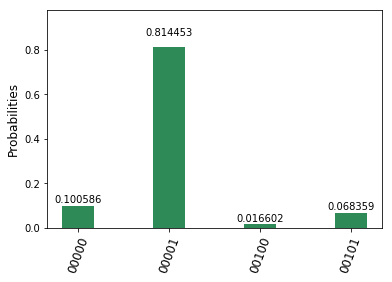

In [39]:
### IBM Q information from past lab to run on IBM Q ###
backend = 'ibmqx4'   # Backend where you execute your program. Check the status of the device before submitting
circuits = ['Grover2']   # Group of quantum circuits to execute
shots = 1024           # Number of shots to run the program (experiment); maximum is 8192 shots.
max_credits = 3          # Maximum number of credits to spend on executions. 
wait = 10   # Time in seconds to wait before checking if the execution is completed.
timeout = 2*1200 # Time in seconds to wait before timeout of execution
result_real = qp1.execute(circuits, backend, shots=shots, max_credits=max_credits, wait=wait, timeout=timeout)

# run on IBM Q and get results
plot_histogram(result_real.get_counts("Grover2"))
# it worked, even tho it shows 0001, it is just because we mapped the qubits differently on IBM Q

# Problem 2: The Quantum Fourier Transform

In this problem, we will look at the Quantum Fourier Transform (QFT), which is an important example of a sub-module that is useful in many different quantum circuits/algorithms, Therefore, it is worth taking a slightly closer look at. The circuit for the module is:
![hyperlink](https://www.dropbox.com/s/5ykg74pdoli0sv0/QFT.png?raw=1)
Where $R_{k}$ is the matrix with z-basis representation:

\begin{equation}
\begin{pmatrix} 1 & 0 \\ 0 & e^{2\pi i/2^{k}} \end{pmatrix}
\end{equation}

and the gates at the end are swap gates reversing the order of the qubits.

a) What is the QFT for n = 1 qubits? What is the circuit diagram for n = 3 qubits using gates that we have used before (i.e. $H, T, S$, etc.)? Code up this circuit in the language of your choice.

# What is the QFT for n = 1 qubits?

It is a single Hadamard gate (the j_n rail on the diagram above, but without the targets for R gates and the swap gate because there is only one qubit).

# What is the circuit diagram for n = 3 qubits using H, T, S gates?

This circuit is comprised of 3 rails. On the topmost rail, we have a Hadamard gate, then a Controlled-S gate with control qubit rail 2 and a Controlled-T gate with control qubit rail 1. On the second rail (middle), we have a Hadamard gate, then a Controlled-S gate with control qubit rail 1, and on the third rail we have a Hadamard gate (after all the controls). We then use a Swap gate for rails 1 and 3 to swap these two qubits and leave the middle rail intouched.

In [56]:
# coding it in QuTip because it's clearly the best tool we used in this class
# 3-qubits QFT circuit
N = 3 # we have 3-qubits for 3-qubits QFT
QFT3_circuit = QubitCircuit(N) # Initialize quantum circuit with 3 qubits

# add gates
# topmost rail
QFT3_circuit.add_gate("SNOT", 2) # Hadamard acting on third qubit
QFT3_circuit.add_gate("CPHASE", 2, 1, arg_value=np.pi/2) # Controlled Phase (S) with target 2 and control 1
QFT3_circuit.add_gate("CPHASE", 2, 0, arg_value=np.pi/4) # Controlled Phase (T) with target 2 and control 0
# middle rail
QFT3_circuit.add_gate("SNOT", 1) # Hadamard acting on second qubit
QFT3_circuit.add_gate("CPHASE", 1, 0, arg_value=np.pi/2) # Controlled Phase (S) with target 1 and control 0
# bottom rail
QFT3_circuit.add_gate("SNOT", 0) # Hadamard acting on first qubit
QFT3_circuit.add_gate("SWAP", [2,0]) # Swap gate acting on qubits 0 and 2

# find product of gates
QFT3_gate = gate_sequence_product(QFT3_circuit.propagators())
# print our S gate and print the QuTip S gate
display(QFT3_gate.tidyup())

Quantum object: dims = [[2, 2, 2], [2, 2, 2]], shape = (8, 8), type = oper, isherm = False
Qobj data =
[[ 0.35355339+0.j          0.35355339+0.j          0.35355339+0.j
   0.35355339+0.j          0.35355339+0.j          0.35355339+0.j
   0.35355339+0.j          0.35355339+0.j        ]
 [ 0.35355339+0.j          0.35355339+0.j          0.35355339+0.j
   0.35355339+0.j         -0.35355339+0.j         -0.35355339+0.j
  -0.35355339+0.j         -0.35355339+0.j        ]
 [ 0.35355339+0.j          0.35355339+0.j         -0.35355339+0.j
  -0.35355339+0.j          0.00000000+0.35355339j  0.00000000+0.35355339j
   0.00000000-0.35355339j  0.00000000-0.35355339j]
 [ 0.35355339+0.j          0.35355339+0.j         -0.35355339+0.j
  -0.35355339+0.j          0.00000000-0.35355339j  0.00000000-0.35355339j
   0.00000000+0.35355339j  0.00000000+0.35355339j]
 [ 0.35355339+0.j         -0.35355339+0.j          0.00000000+0.35355339j
   0.00000000-0.35355339j  0.25000000+0.25j       -0.25000000-0.25j
  -0.25

b) How does the QFT you found above act on the state $\left|0\right\rangle^{\otimes n}$? Is this a general feature of the QFT? If yes, explain why. If not, explain why not.

In [62]:
# build |000> state
zero_ket = basis(2,0)
zero_ket_2qubits = tensor(zeroo_ket, zeroo_ket)
zero_ket_3qubits = tensor(zero_ket_2qubits, zero_ket)
display(zero_ket_3qubits)

# apply QFT 3-qubits on our |000> state
display(QFT3_gate * zero_ket_3qubits)

Quantum object: dims = [[2, 2, 2], [1, 1, 1]], shape = (8, 1), type = ket
Qobj data =
[[ 1.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]]

Quantum object: dims = [[2, 2, 2], [1, 1, 1]], shape = (8, 1), type = ket
Qobj data =
[[ 0.35355339]
 [ 0.35355339]
 [ 0.35355339]
 [ 0.35355339]
 [ 0.35355339]
 [ 0.35355339]
 [ 0.35355339]
 [ 0.35355339]]

# How does QFT act on |0>^n and is this a general feature of QFT?

As we can see, on the |0>^n state, the QFT applied to it yields the first column of the QFT gate, which is the equal superposition of all the states. As we can see from the output vector, all states have the exact same value and thus we are in an equal superposition of each of the possible states for the number of qubits we have. This is a feature of the QFT and will always happen when we run a |0...0> on the Quantum Fourier Transform for any arbitrary amount of qubits. The value of the coefficients will change to preserve the unit length of the vector, but the superposition will remain equal.

This is a feature of the QFT because of the way it applies the Hadamard matrix. As we know, the Hadamard matrix creates a superposition. In the case with only one qubit, we only have one Hadamard matrix and thus the QFT creates a perfect superposition from the |0> state. Henceforth, we can prove by induction that as we expand, since all qubits are 0, the controlled gates are not activated and we really only have a series of rails on which only the Hadamard is applied.

c) How many gates does the QFT have? What is the gate complexity class in terms of the number of qubits $n$? The QFT is similar to the classical Discrete Fourier Transform. What is gate complexity class of this algorithm in terms of the number of $n$ bits? What does this tell you about the QFT and potentially algorithms that use it as a submodule?

# Gates & QFT Complexity

In this QFT with 3-qubits example, we have 3 Hadamard gates, 3 R gates and 1 swap gate. However, since we are on a 3-qubits system, this number of gates can run a total 2^n = 2^3 = 8. Expanding this into a recurrence equation gives us an O(2^n) gates. In terms of the number of qubits, this becomes O(n log n) runtime for the QFT, where n is the number of qubits.

To contrast, the Discrete Fourier Transform runs in time O(n 2^n), where n is the number of bits. As a result, we can  clearly see that any algorithm that uses QFT as a submodule, like for instance Shor's algorithm and computing the discrete logarithm, receives an exponential speed-up from using QFT. QFT is exponentially faster compared to the Discrete Fourier Transform and thus all algorithms using it will benefit from this exponential speed-up. If the Discrete Fourier Transform is the bottleneck runtime component of an algorithm, then converting it to QFT brings the algorithm runtime in polynomial space, which is a major improvement, but we must keep in mind that for some algorithms, there might remain exponential subroutines which constitute bottlenecks for the runtime of the algorithm to become polynomial space. In any case the QFT provides a major speed improvement.

The phase estimation is an algorithm that uses the QFT. Phase estimation works as follows. For some unitary gate $U$ with eigenvector $\left|u\right\rangle$ and eigenvalue $e^{i\theta}$, we can estimate the eigenvalue $\theta$ using the circuit:

![hyperlink](https://www.dropbox.com/s/aipsymlmkmx7g1c/PhaseCircuit.svg?raw=1)

where $QFT^{\dagger}$ is the inverse of the quantum fourier transform. We will get the correct $n$-bit approximation to $\theta$ with at least probability $p$ if we use $t$ qubits, where:

\begin{equation}
t = n + \left\lceil \log\left(2 + \frac{1}{2(1-p)}\right) \right\rceil
\end{equation}

and $\left\lceil x \right\rceil$ is the least integer greater than or equal to $x$ (e.g. $\left\lceil 1.2 \right\rceil = 2$). 

d) How many qubits would you need if you wanted the 10-bit approximation to your phase to a 90% certainty? 99%? 99.9%? 99.99999%? Describe a challenge that real quantum computers would face to actually realizing such a large certainty.

In [70]:
# constant
n = 10

# define function to find t
def t(p):
    return int(n + np.ceil(np.log(2 + (1 / (2 * (1 - p))))))

# 90% certainty
p1 = 0.90
display(t(p1)) # 12 qubits

# 99% certainty
p2 = 0.99
display(t(p2)) # 14 qubits

# 99.9% certainty
p3 = 0.999
display(t(p3)) # 17 qubits

# 99.99999% certainty
p4 = 0.9999999
display(t(p4)) # 26 qubits

12

14

17

26

# Challenge that quantum computers face to realize such certainty

As we can see, the number of bits increases exponentially for a very small increase in certainty. Less than a 1% increase in certainty almost doubled the number of qubits required. As a result, one main challenge that quantum computers face to realize such certainty is simply in scaling. It is very difficult to scale a quantum computer as the decoherence gets very high. In order to realize such certainty, quantum computers would need to be able to scale easily and rapidly so that we could create large enough quantum computers that have enough qubits to realize this certainty. 

A better solution would be to keep smaller quantum computers and repeat the algorithm. With 90% certainty, we could run the algorithm twice, which doubles the runtime but makes the probability of failure 0.1^2, which is very small. We could repeat this many more times and thus the tradeoff becomes a slower runtime to avoid the need of having much larger quantum computers. Since the QFT runs in O(n log n) in the number of qubits and we are only using 12 qubits in this example, repeating the algorithm and amplifying the probability of success seems like the appropriate and most affordable choice.

e) How many gates are needed to perform the phase estimation algorithm? What does this tell you about the usefulness of the QFT? 

# Number of gates of phase estimation algorithm

Judging from the circuit drawing, there is 1 Hadamard per qubit, so n Hadamard gates. There is 1 Controlled-U gate per qubit above the first qubit, so n - 1 Controlled-U gates, then we have the QFT which contains O(n^2) gates but is run on n - 1 gates here. As a result, we have O(n Hadamard + n - 1 Controlled-U + (n - 1)^2 from QFT) = O(n^2) gates. A more precise approximate would be roughly n + n - 1 + O(n^2) so roughly 2n + O(n^2) gates in the phase estimation algorithm, but since we are talking about asymptotic number of gates the algorithm gates growth factor is bounded by n^2. 

This shows how useful QFT is. In this case, QFT is responsible for the bottleneck runtime of the phase estimation algorithm, all the other gates grow in a linear fashion with the number of qubits. As a result, moving from Discrete Fourier Transform to QFT brings the phase estimation algorithm from exponential space to polynomial space, which makes it useful and usable (it solves an open problem, in a sense). This shows how useful and important QFT is as without QFT, this algorithm would remain exponential time and would not be anywhere as useful.